<a href="https://colab.research.google.com/github/3lochana/20331A05C3/blob/main/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from collections import Counter
import itertools
# Load the csv file
dataframe = pd.read_csv("/content/drive/MyDrive/csv_files/creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataframe.isnull().values.any()

False

In [4]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [5]:
non_fraud = len(dataframe[dataframe.Class == 0])
#counts the occurences of each class label
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


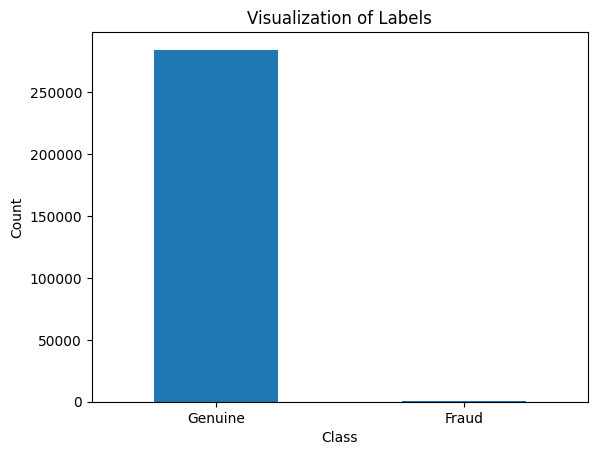

In [6]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [7]:
#Applying scaling technique
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [8]:
#spiltting the  data
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


Applying machine learning algorithms to credit card dataset

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators= 5)

In [10]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.94850368081644
Decision Tree Score:  99.91924440855307


# Metrices for classifiers

In [11]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


### metrics for random forest

In [12]:
print("Accuracy: {:.5f}".format(accuracy_score(test_Y, predictions_rf)))
print("Precision: {:.5f}".format(precision_score(test_Y, predictions_rf)))
print("Recall: {:.5f}".format(recall_score(test_Y, predictions_rf)))
print("F1-score: {:.5f}".format(f1_score(test_Y, predictions_rf)))

Accuracy: 0.99949
Precision: 0.89655
Recall: 0.76471
F1-score: 0.82540


### metrics for decision tree

In [13]:
print("Accuracy: {:.5f}".format(accuracy_score(test_Y, predictions_dt)))
print("Precision: {:.5f}".format(precision_score(test_Y, predictions_dt)))
print("Recall: {:.5f}".format(recall_score(test_Y, predictions_dt)))
print("F1-score: {:.5f}".format(f1_score(test_Y, predictions_dt)))

Accuracy: 0.99919
Precision: 0.71613
Recall: 0.81618
F1-score: 0.76289


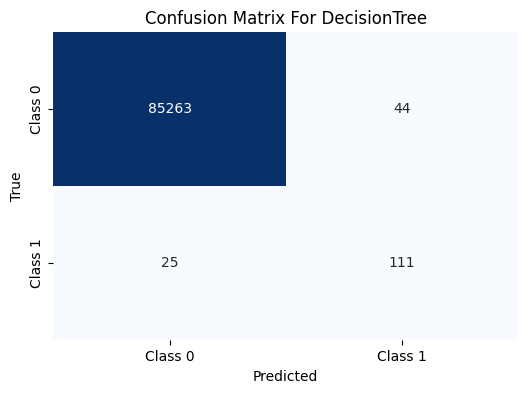

In [14]:
#Decision tree classifier Confusion-Matrix
import seaborn as sns
CM_DT = confusion_matrix(test_Y,predictions_dt )
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(CM_DT, annot=True, cmap='Blues', fmt='d', cbar=False,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix For DecisionTree')
plt.show()

In [15]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85263    44]
 [   25   111]]


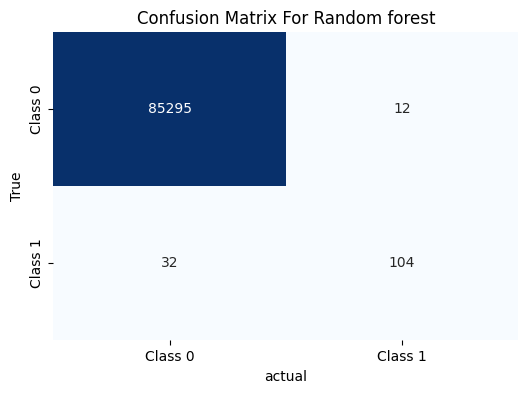

In [16]:
CM_RF = confusion_matrix(test_Y,predictions_rf )
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(CM_RF, annot=True, cmap='Blues', fmt='d', cbar=False,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('actual')
plt.ylabel('True')
plt.title('Confusion Matrix For Random forest')
plt.show()

In [17]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random forest")
print(confusion_matrix_rf)

Confusion Matrix - Random forest
[[85295    12]
 [   32   104]]


Addressing the class imbalance issue

In [18]:
from imblearn.over_sampling import SMOTE
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [19]:
rf_resampled = RandomForestClassifier(n_estimators = 5)
rf_resampled.fit(train_X, train_Y)
predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100
print(random_forest_score_resampled)

99.98124146340034


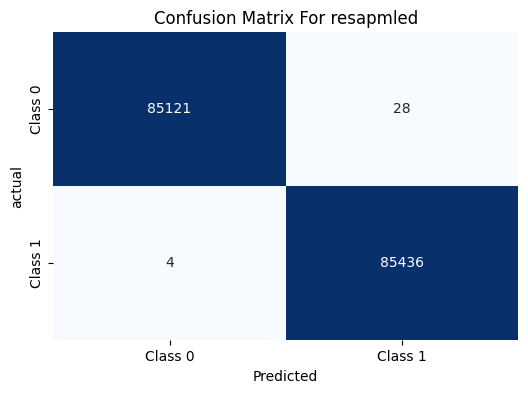

In [20]:
CM_RRF = confusion_matrix(test_Y,predictions_resampled )
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(CM_RRF, annot=True, cmap='Blues', fmt='d', cbar=False,xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix For resapmled')
plt.show()